In [1]:
!nvidia-smi

Sun Jun 16 21:49:27 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 555.99                 Driver Version: 555.99         CUDA Version: 12.5     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                  Driver-Model | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce GTX 1650      WDDM  |   00000000:01:00.0 Off |                  N/A |
| N/A   45C    P0             17W /   65W |      95MiB /   4096MiB |     19%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [2]:
import os
HOME = os.getcwd()
print(HOME)

d:\Intel\icu


In [3]:
from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.2.32  Python-3.11.5 torch-2.2.1+cpu CPU (AMD Ryzen 7 4800H with Radeon Graphics)
Setup complete  (16 CPUs, 15.4 GB RAM, 12.9/146.5 GB disk)


In [4]:
from ultralytics import YOLO

from IPython.display import display, Image

### 💻 CLI

In [6]:
%cd {HOME}
!yolo task=detect mode=predict model=yolov8n.pt conf=0.25 source='D:\\Intel\\images\\46.jpg'

d:\Intel\icu
Ultralytics YOLOv8.2.32 🚀 Python-3.11.5 torch-2.2.1+cpu CPU (AMD Ryzen 7 4800H with Radeon Graphics)
YOLOv8n summary (fused): 168 layers, 3151904 parameters, 0 gradients, 8.7 GFLOPs

image 1/1 D:\Intel\images\46.jpg: 480x640 5 persons, 2 ties, 1 sink, 238.6ms
Speed: 14.4ms preprocess, 238.6ms inference, 18.4ms postprocess per image at shape (1, 3, 480, 640)
Results saved to runs\detect\predict5
💡 Learn more at https://docs.ultralytics.com/modes/predict


In [ ]:
# %cd {HOME}
# Image(filename='runs/detect/predict/1.jpeg', height=600)

### 🐍 Python SDK

The simplest way of simply using YOLOv8 directly in a Python environment.

In [ ]:
model = YOLO(f'{HOME}/yolov8n.pt')
results = model.predict(source='https://media.roboflow.com/notebooks/examples/dog.jpeg', conf=0.25)

Ultralytics YOLOv8.0.20 🚀 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)
YOLOv8n summary (fused): 168 layers, 3151904 parameters, 0 gradients, 8.7 GFLOPs
Found https://media.roboflow.com/notebooks/examples/dog.jpeg locally at dog.jpeg


In [ ]:
results[0].boxes.xyxy

tensor([[   0.,  314.,  625., 1278.],
        [  55.,  250.,  648., 1266.],
        [ 633.,  720.,  701.,  786.]], device='cuda:0')

In [ ]:
results[0].boxes.conf

tensor([0.72712, 0.29066, 0.28456], device='cuda:0')

In [ ]:
results[0].boxes.cls

tensor([ 0., 16.,  2.], device='cuda:0')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [12]:
import os
os.chdir(r'D:\Intel\icu\train\images')


In [14]:
os.chdir(r'D:\Intel\icu\train\images')

!yolo task=detect mode=train model=yolov8s.pt data= 'D:\\Intel\\icu\\data.yaml' epochs=25 imgsz=224 plots=True

Ultralytics YOLOv8.2.32 🚀 Python-3.11.5 torch-2.2.1+cpu CPU (AMD Ryzen 7 4800H with Radeon Graphics)
engine\trainer: task=detect, mode=train, model=yolov8s.pt, data=D:\Intel\icu\data.yaml, epochs=25, time=None, patience=100, batch=16, imgsz=224, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=


train: Scanning D:\Intel\extracted_files\train\labels.cache... 41 images, 0 backgrounds, 0 corrupt: 100%|██████████| 41/41 [00:00<?, ?it/s]
train: Scanning D:\Intel\extracted_files\train\labels.cache... 41 images, 0 backgrounds, 0 corrupt: 100%|██████████| 41/41 [00:00<?, ?it/s]

val: Scanning D:\Intel\extracted_files\valid\labels.cache... 13 images, 1 backgrounds, 0 corrupt: 100%|██████████| 13/13 [00:00<?, ?it/s]
val: Scanning D:\Intel\extracted_files\valid\labels.cache... 13 images, 1 backgrounds, 0 corrupt: 100%|██████████| 13/13 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]
       1/25         0G      2.117      3.594      1.807         55        224:   0%|          | 0/3 [00:03<?, ?it/s]
       1/25         0G      2.117      3.594      1.807         55        224:  33%|███▎      | 1/3 [00:03<00:07,  3.93s/it]
       1/25         0G      2.301      3.569       1.92         73        224:  33%|███▎      | 1/3 [00:07<00:07,  3.93s/it]
       1/25         0G      2.301   

In [17]:

!dir "D:\\Intel\\icu\\runs\\detect\\train2\\"


The specified path is invalid.


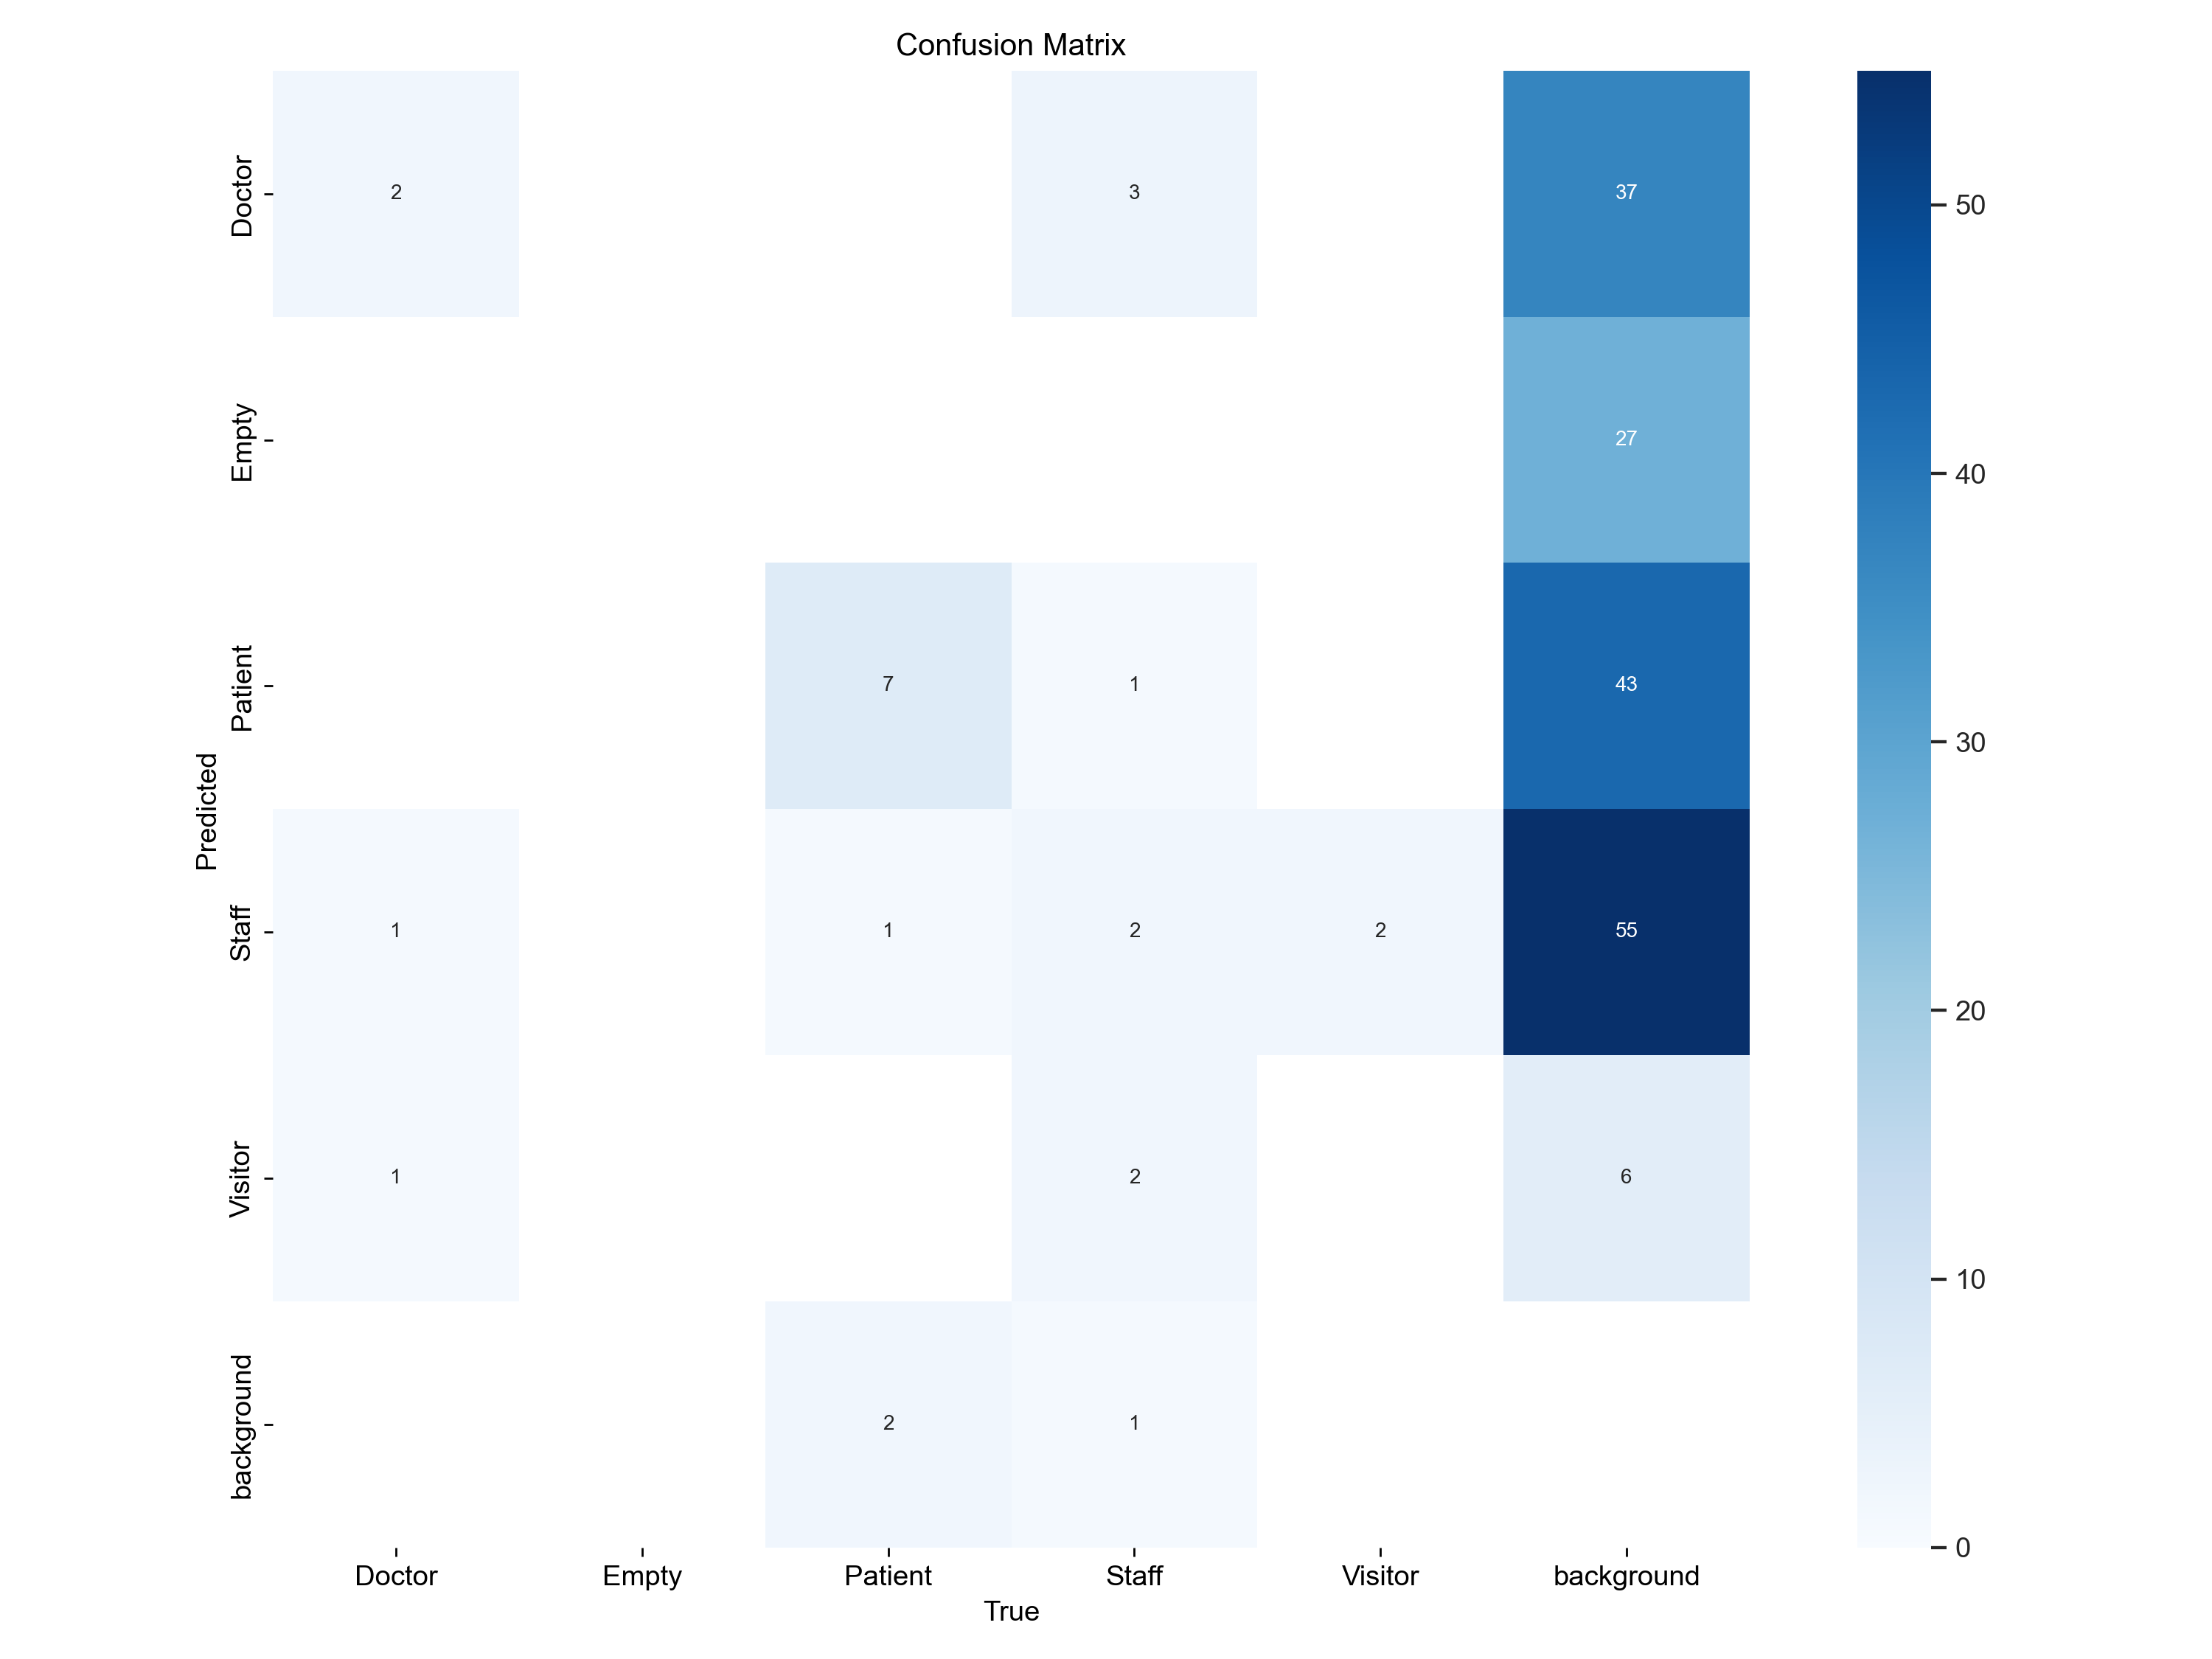

In [18]:
Image(filename='D:\\Intel\\icu\\runs\\detect\\train2\\confusion_matrix.png', width=600)

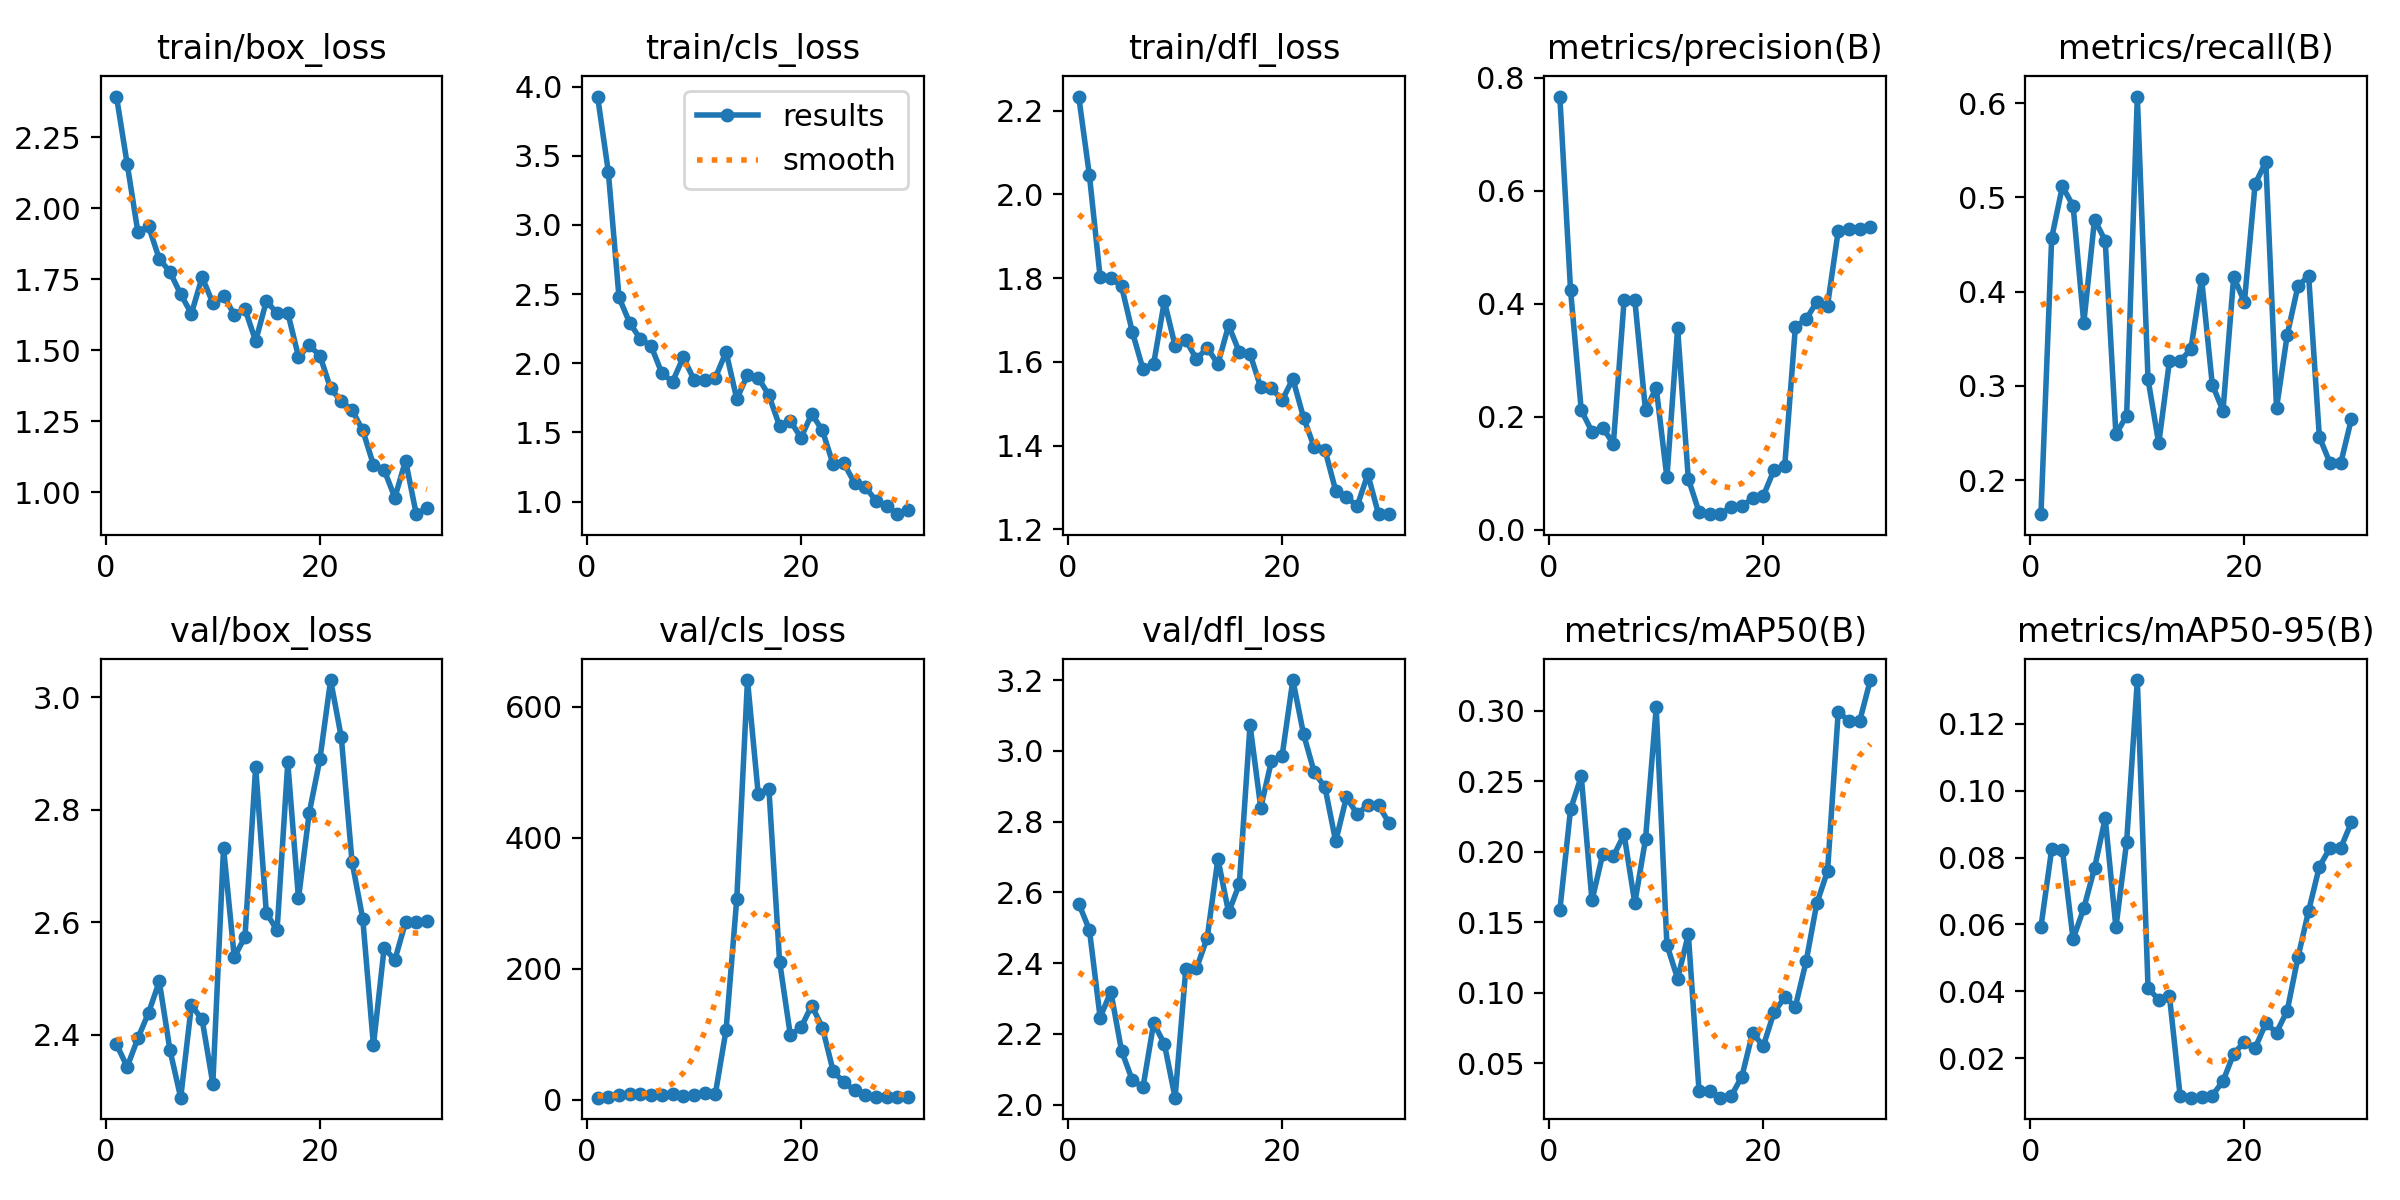

In [19]:
Image(filename='D:\\Intel\\icu\\runs\\detect\\train2\\results.png', width=600)

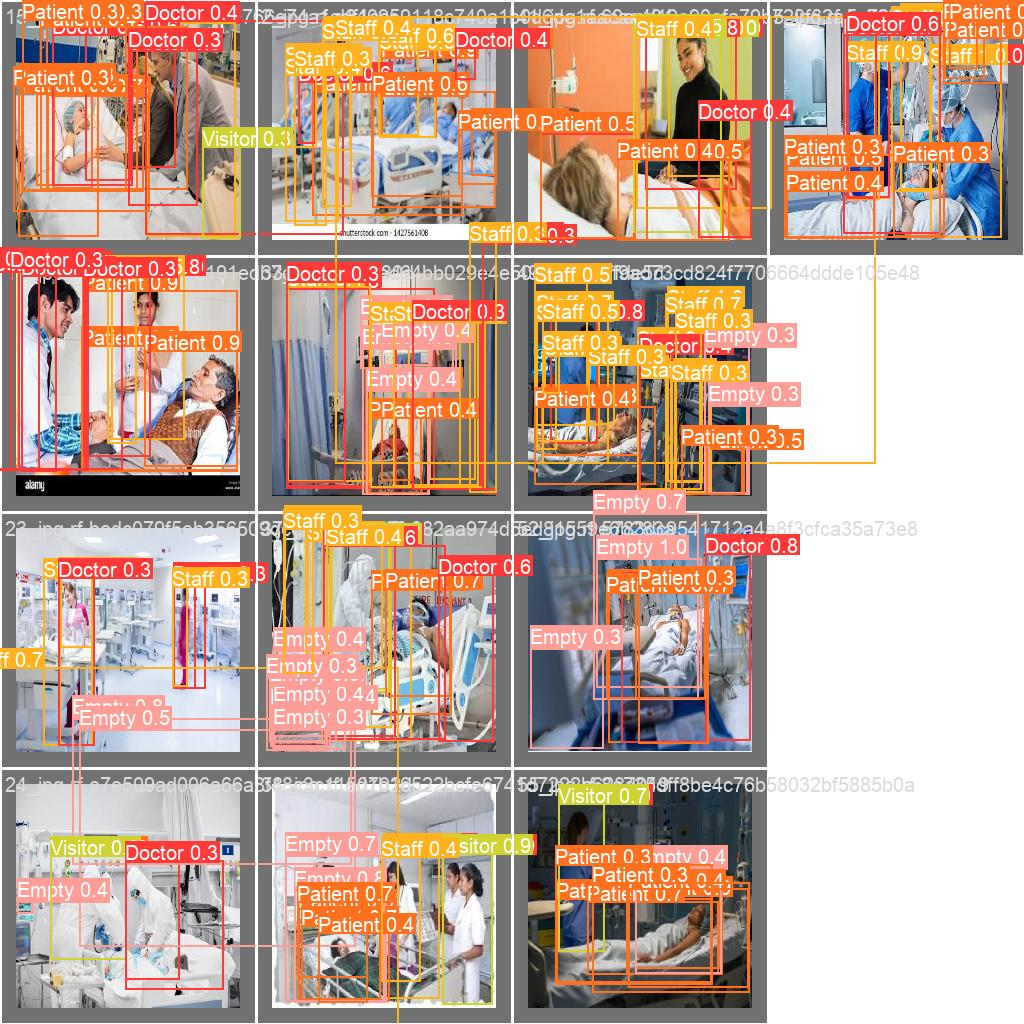

In [20]:
Image(filename='D:\\Intel\\icu\\runs\\detect\\train2\\val_batch0_pred.jpg', width=600)

In [22]:
!yolo task=detect mode=val model='D:\\Intel\\icu\\runs\\detect\\train2\\weights\\best.pt' data='D:\\Intel\\icu\\data.yaml'

Ultralytics YOLOv8.2.32 🚀 Python-3.11.5 torch-2.2.1+cpu CPU (AMD Ryzen 7 4800H with Radeon Graphics)
YOLOv9e summary (fused): 687 layers, 57380255 parameters, 0 gradients, 189.1 GFLOPs
                   all         13         25      0.249      0.607      0.298      0.131
                Doctor          3          4      0.141       0.75      0.172     0.0599
               Patient          9         10       0.28        0.4      0.202     0.0604
                 Staff          6          9      0.265      0.778      0.631      0.283
               Visitor          2          2      0.308        0.5      0.186      0.119
Speed: 0.2ms preprocess, 893.6ms inference, 0.0ms loss, 1.6ms postprocess per image
Results saved to runs\detect\val2
💡 Learn more at https://docs.ultralytics.com/modes/val



val: Scanning D:\Intel\extracted_files\valid\labels.cache... 13 images, 1 backgrounds, 0 corrupt: 100%|██████████| 13/13 [00:00<?, ?it/s]
val: Scanning D:\Intel\extracted_files\valid\labels.cache... 13 images, 1 backgrounds, 0 corrupt: 100%|██████████| 13/13 [00:00<?, ?it/s]

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/1 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:11<00:00, 11.73s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:11<00:00, 11.73s/it]


In [23]:
!yolo task=detect mode=predict model='D:\\Intel\\icu\\runs\\detect\\train2\\weights\\best.pt' conf=0.25 source='D:\\Intel\\icu\\test\\images'

Ultralytics YOLOv8.2.32 🚀 Python-3.11.5 torch-2.2.1+cpu CPU (AMD Ryzen 7 4800H with Radeon Graphics)
YOLOv9e summary (fused): 687 layers, 57380255 parameters, 0 gradients, 189.1 GFLOPs

image 1/5 D:\Intel\icu\test\images\11_jpeg.rf.b79dae6ceca9324c01c22f22f0e73bb2.jpg: 224x224 4 Doctors, 1 Empty, 4 Patients, 3 Staffs, 839.6ms
image 2/5 D:\Intel\icu\test\images\14_jpeg.rf.172e30128dfbf6b72d628bb581fdb26b.jpg: 224x224 2 Doctors, 2 Emptys, 7 Patients, 4 Staffs, 1 Visitor, 756.4ms
image 3/5 D:\Intel\icu\test\images\16_jpeg.rf.6f3f15810eb30eb7552cafdc33a57d08.jpg: 224x224 9 Doctors, 8 Patients, 6 Staffs, 743.1ms
image 4/5 D:\Intel\icu\test\images\44_jpg.rf.c93b5d4310b24946b41974746ba47e2b.jpg: 224x224 4 Doctors, 5 Emptys, 2 Patients, 1 Staff, 1 Visitor, 749.3ms
image 5/5 D:\Intel\icu\test\images\58_jpg.rf.35700fd8eb55f6fdc027ce68877c921b.jpg: 224x224 3 Doctors, 3 Emptys, 3 Patients, 8 Staffs, 752.9ms
Speed: 0.7ms preprocess, 768.3ms inference, 0.0ms postprocess per image at shape (1, 3, 224

In [24]:
import os
import cv2
from matplotlib import pyplot as plt


!yolo task=detect mode=predict model='D:\\Intel\\icu\\runs\\detect\\train2\\weights\\best.pt' conf=0.25 source='D:\\Intel\\icu\\test\\images' save=True project='D:\\Intel\\icu\\runs\\detect\\new_test_result'

results_path = 'D:\\Intel\\icu\\runs\\detect\\new_test_result'

def display_images_from_directory(directory):
    image_files = [f for f in os.listdir(directory) if os.path.isfile(os.path.join(directory, f))]
    
    for image_file in image_files:
        image_path = os.path.join(directory, image_file)
        image = cv2.imread(image_path)
        image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        
        plt.figure(figsize=(10, 10))
        plt.imshow(image_rgb)
        plt.title(image_file)
        plt.axis('off')
        plt.show()

display_images_from_directory(results_path)


Ultralytics YOLOv8.2.32 🚀 Python-3.11.5 torch-2.2.1+cpu CPU (AMD Ryzen 7 4800H with Radeon Graphics)
YOLOv9e summary (fused): 687 layers, 57380255 parameters, 0 gradients, 189.1 GFLOPs

image 1/5 D:\Intel\icu\test\images\11_jpeg.rf.b79dae6ceca9324c01c22f22f0e73bb2.jpg: 224x224 4 Doctors, 1 Empty, 4 Patients, 3 Staffs, 777.6ms
image 2/5 D:\Intel\icu\test\images\14_jpeg.rf.172e30128dfbf6b72d628bb581fdb26b.jpg: 224x224 2 Doctors, 2 Emptys, 7 Patients, 4 Staffs, 1 Visitor, 725.4ms
image 3/5 D:\Intel\icu\test\images\16_jpeg.rf.6f3f15810eb30eb7552cafdc33a57d08.jpg: 224x224 9 Doctors, 8 Patients, 6 Staffs, 751.1ms
image 4/5 D:\Intel\icu\test\images\44_jpg.rf.c93b5d4310b24946b41974746ba47e2b.jpg: 224x224 4 Doctors, 5 Emptys, 2 Patients, 1 Staff, 1 Visitor, 751.5ms
image 5/5 D:\Intel\icu\test\images\58_jpg.rf.35700fd8eb55f6fdc027ce68877c921b.jpg: 224x224 3 Doctors, 3 Emptys, 3 Patients, 8 Staffs, 727.2ms
Speed: 0.5ms preprocess, 746.5ms inference, 2.1ms postprocess per image at shape (1, 3, 224

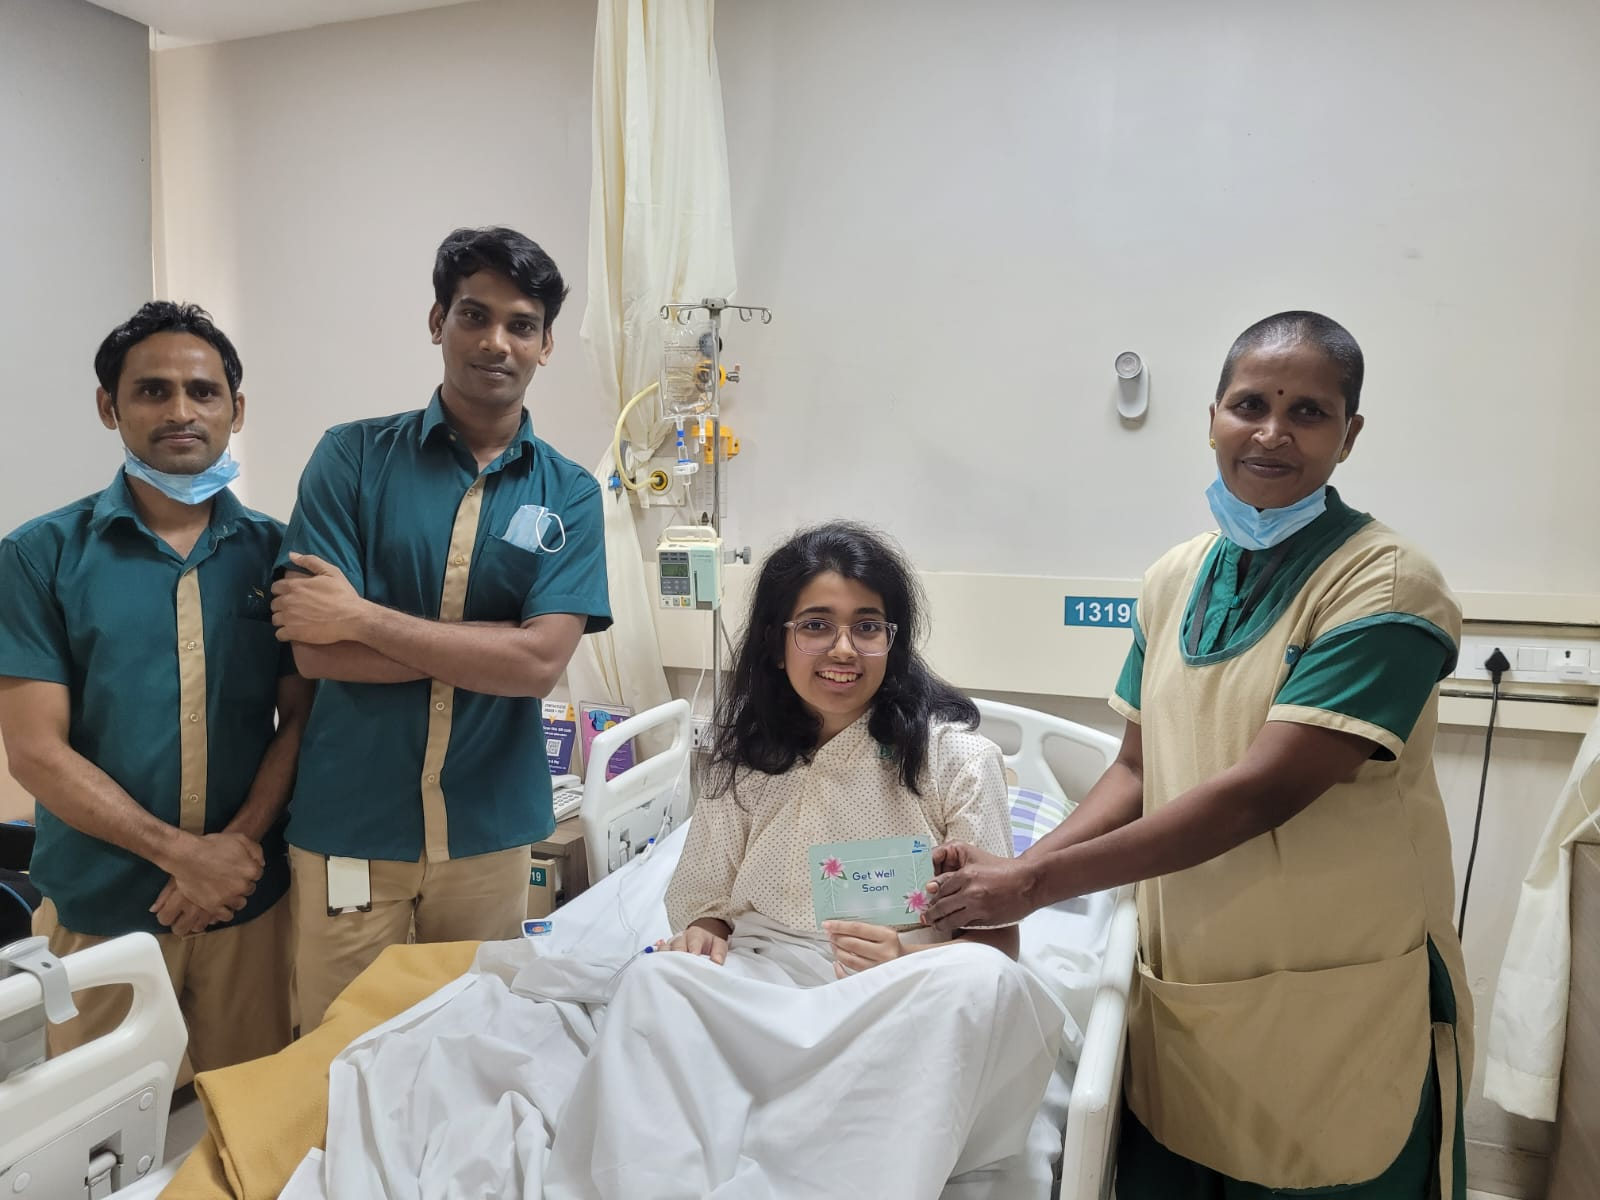

In [26]:
import glob
from IPython.display import Image, display

for image_path in glob.glob('D:\\Intel\\images\\46.jpg')[:3]:
      display(Image(filename=image_path, width=600))
      print("\n")